# 05차시 계층적 군집분석(Hierarchical Clustering)

## 01 계층적 군집 분석 개요

### 계층적 군집 분석의 특징

- 데이터간 유사도를 기반으로 계산하며 군집의 개수가 정해져 있지 않음
- 계층적 군집분석을 실시하는 과정과 실시 후 특정 군집 개수로 데이터를 라벨링 하는 과정이 있음
- 데이터의 변동에 민감하며 학습 데이터가 많을 경우 연산에 많은 시간 소요

### 계층도(Dendrogram)

- 계층적 군집분석의 산출물 중 하나로 데이터간 거리 기반으로 도식화한 도표
- 계층도의 높이는 데이터 또는 군집간 거리에 비례

## 02 주요 함수 및 메서드 소개

### sklearn - AgglomerativeClustering()

- 계층적 군집분석을 실시할 수 있는 sklearn의 함수
- n_clusters에 분리할 군집 개수를 설정
- affinity에 데이터 간 거리계산 방법, linkage에 군집 간 유사도 방법 설정


In [1]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv("실습파일/iris.csv")
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df_sub = df.iloc[:, :-1]
df_sub.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
model = AgglomerativeClustering(n_clusters = 3).fit(df_sub)
model

AgglomerativeClustering(n_clusters=3)

In [5]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [6]:
df["cluster"] = model.labels_
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,cluster
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [7]:
pd.crosstab(df["Species"], df["cluster"])

cluster,0,1,2
Species,,,
setosa,0,50,0
versicolor,49,0,1
virginica,15,0,35


In [8]:
df.groupby("cluster").mean().reset_index()

,cluster,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,0,5.920312,2.751562,4.420312,1.434375
1,1,5.006000,3.428000,1.462000,0.246000
2,2,6.869444,3.086111,5.769444,2.105556


### scipy - dendrogram(), linkage()

- 계층도(dendrogram)을 그리기 위한 scipy의 함수
- linkage() 함수로 데이터 간 거리 계산 및 군집 형성을 실시
- dendrogram() 함수로 계층도 시각화

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

In [10]:
link = linkage(df_sub, method = "ward")
link

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.00000000e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.00000000e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.00000000e-01, 2.00000000e+00],
       [1.28000000e+02, 1.32000000e+02, 1.00000000e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.00000000e-01, 2.00000000e+00],
       [4.00000000e+00, 3.70000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.90000000e+01, 2.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [2.90000000e+01, 3.00000000e+01, 1.41421356e-01, 2.00000000e+00],
       [5.70000000e+01, 9.30000000e+01, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+01, 8.10000000e+01, 1.41421356e-01, 2.00000000e+00],
       [1.16000000e+02, 1.37000000e+02, 1.41421356e-01, 2.00000000e+00],
       [8.00000000e+00, 3.80000000e+01, 1.41421356e-01, 2.00000000e+00],
       [3.00000000e+00, 4.70000000e+01, 1.41421356e

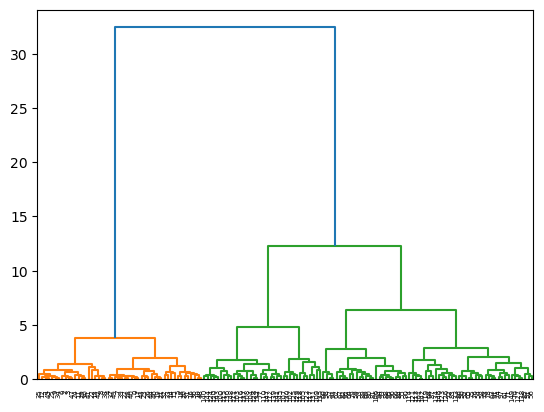

In [12]:
plt.figure()
dendrogram(link)
plt.show()

## Q1 당뇨병 여부(Outcome) 변수를 제외한 나머지 변수를 입력으로 하고 계층적 군집분석을 실시했을 때 3번 군집의 인슐린(Insulin) 평균은?
1) 4개의 군집으로 Ward, Euclidean 방법 사용

In [15]:
Q1 = pd.read_csv("실습파일/diabetes.csv")
Q1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
Q1_sub = Q1.iloc[:, :-1]
Q1_sub.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [19]:
model = AgglomerativeClustering(n_clusters = 4).fit(Q1_sub)
model

AgglomerativeClustering(n_clusters=4)

In [20]:
Q1["cluster"] = model.labels_
Q1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster
0,6,148,72,35,0,33.6,0.627,50,1,1
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,1
3,1,89,66,23,94,28.1,0.167,21,0,3
4,0,137,40,35,168,43.1,2.288,33,1,0


In [23]:
Q1.groupby("cluster")["Insulin"].mean().reset_index()

,cluster,Insulin
0,0,207.018182
1,1,0.620779
2,2,548.833333
3,3,85.050000


## Q2 당뇨병 여부(Outcome) 변수를 제외한 나머지 변수를 입력으로 하고 계층적 군집분석을 실시했을 때 6개의 군집으로 분할하는 경우 군집 개수가 가장 큰 군집의 행 개수는?
1) Pregnancies가 0이면서 BMI가 0보다 큰 데이터만 사용

In [29]:
Q2_sub = Q1_sub.loc[(Q1_sub["Pregnancies"] == 0) & (Q1_sub["BMI"] > 0)]
Q2_sub

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
4,0,137,40,35,168,43.1,2.288,33
16,0,118,84,47,230,45.8,0.551,31
45,0,180,66,39,0,42.0,1.893,25
57,0,100,88,60,110,46.8,0.962,31
58,0,146,82,0,0,40.5,1.781,44
...,...,...,...,...,...,...,...,...
713,0,134,58,20,291,26.4,0.352,21
727,0,141,84,26,0,32.4,0.433,22
736,0,126,86,27,120,27.4,0.515,21
753,0,181,88,44,510,43.3,0.222,26


In [30]:
Q2_model = AgglomerativeClustering(n_clusters = 6).fit(Q2_sub)
Q2_model.labels_

array([3, 3, 0, 1, 0, 1, 0, 4, 0, 0, 1, 1, 0, 0, 1, 1, 0, 5, 0, 1, 1, 0,
       0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 4, 0, 1, 0, 1, 1, 0, 3, 4, 1, 3, 1,
       0, 5, 4, 0, 1, 1, 1, 0, 0, 0, 3, 1, 1, 4, 0, 0, 1, 1, 1, 3, 1, 1,
       1, 0, 0, 0, 0, 1, 4, 3, 5, 1, 3, 3, 0, 0, 0, 0, 3, 5, 0, 3, 0, 4,
       3, 0, 5, 4, 1, 0, 0, 1, 1, 3, 0, 0, 0, 1, 4, 5, 0, 1, 2, 0],
      dtype=int64)

In [32]:
Q2_sub["cluster"] = Q2_model.labels_
Q2_sub["cluster"].value_counts()

C:\Users\jtkim\AppData\Local\Temp\ipykernel_29124\2297706429.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q2_sub["cluster"] = Q2_model.labels_


0    44
1    33
3    13
4     9
5     6
2     3
Name: cluster, dtype: int64

## Q3 당뇨병 여부(Outcome) 변수를 제외한 나머지 변수를 입력으로 하고 계층적 군집분석을 실시했을 때 6개의 군집으로 분할하는 경우 1번과 2번 군집의 유클리드 거리는 얼마인가?

In [36]:
Q3 = pd.read_csv("실습파일/diabetes.csv")
Q3.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
Q3_sub = Q3.loc[(Q3["Pregnancies"] == 0) & (Q3["BMI"] > 0), :"Age"]
Q3_sub.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
4,0,137,40,35,168,43.1,2.288,33
16,0,118,84,47,230,45.8,0.551,31
45,0,180,66,39,0,42.0,1.893,25
57,0,100,88,60,110,46.8,0.962,31
58,0,146,82,0,0,40.5,1.781,44


In [39]:
Q3_model = AgglomerativeClustering(n_clusters = 6).fit(Q3_sub)
Q3_sub["cluster"] = Q3_model.labels_
Q3_sub.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,cluster
4,0,137,40,35,168,43.1,2.288,33,3
16,0,118,84,47,230,45.8,0.551,31,3
45,0,180,66,39,0,42.0,1.893,25,0
57,0,100,88,60,110,46.8,0.962,31,1
58,0,146,82,0,0,40.5,1.781,44,0


In [41]:
Q3_cl = Q3_sub.groupby("cluster").mean().reset_index()
Q3_cl

,cluster,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,0.0,122.840909,74.886364,15.795455,0.318182,32.659091,0.508614,31.000000
1,1,0.0,109.121212,74.666667,30.939394,94.424242,36.978788,0.455333,24.060606
2,2,0.0,174.333333,79.333333,35.333333,556.000000,43.400000,0.573667,23.333333
3,3,0.0,134.153846,67.538462,31.076923,195.153846,35.400000,0.682615,25.076923
4,4,0.0,125.555556,0.000000,0.000000,0.000000,34.522222,0.505000,28.444444
5,5,0.0,156.000000,73.333333,33.333333,273.666667,41.300000,0.451500,31.166667


In [42]:
Q3_cl = Q3_cl.iloc[:, 1:]
Q3_cl

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.0,122.840909,74.886364,15.795455,0.318182,32.659091,0.508614,31.000000
1,0.0,109.121212,74.666667,30.939394,94.424242,36.978788,0.455333,24.060606
2,0.0,174.333333,79.333333,35.333333,556.000000,43.400000,0.573667,23.333333
3,0.0,134.153846,67.538462,31.076923,195.153846,35.400000,0.682615,25.076923
4,0.0,125.555556,0.000000,0.000000,0.000000,34.522222,0.505000,28.444444
5,0.0,156.000000,73.333333,33.333333,273.666667,41.300000,0.451500,31.166667


In [43]:
Q3_cl_t = Q3_cl.transpose()
Q3_cl_t

,0,1,2,3,4,5
Pregnancies,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Glucose,122.840909,109.121212,174.333333,134.153846,125.555556,156.000000
BloodPressure,74.886364,74.666667,79.333333,67.538462,0.000000,73.333333
SkinThickness,15.795455,30.939394,35.333333,31.076923,0.000000,33.333333
Insulin,0.318182,94.424242,556.000000,195.153846,0.000000,273.666667
BMI,32.659091,36.978788,43.400000,35.400000,34.522222,41.300000
DiabetesPedigreeFunction,0.508614,0.455333,0.573667,0.682615,0.505000,0.451500
Age,31.000000,24.060606,23.333333,25.076923,28.444444,31.166667


In [44]:
Q3_cl_t["diff"] = Q3_cl_t[1] - Q3_cl_t[2] # 여기서 1, 2는 변수명임
Q3_cl_t.head()

,0,1,2,3,4,5,diff
Pregnancies,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Glucose,122.840909,109.121212,174.333333,134.153846,125.555556,156.000000,-65.212121
BloodPressure,74.886364,74.666667,79.333333,67.538462,0.000000,73.333333,-4.666667
SkinThickness,15.795455,30.939394,35.333333,31.076923,0.000000,33.333333,-4.393939
Insulin,0.318182,94.424242,556.000000,195.153846,0.000000,273.666667,-461.575758


In [45]:
(Q3_cl_t["diff"] ** 2).sum() ** 0.5

466.248496093336